## Are all sets of interpolation points equivalent?
In this demo, we'll look at two ways of interpolating
a function $f(x)$. The function we use is a simple one:
$$ f(x) = 1/(1+x^2) $$
This is also called "Runge's function"



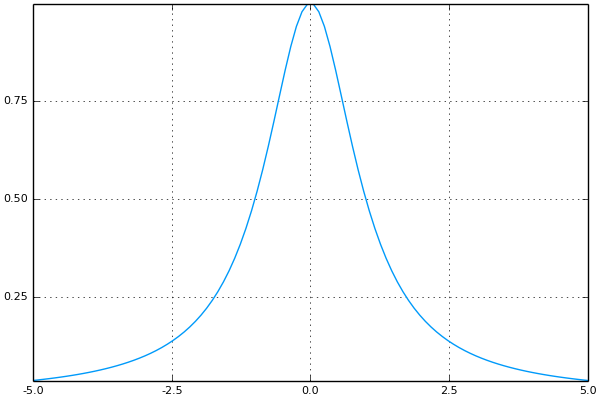

In [4]:
using Plots
f = x-> 1./(1+x.^2) # create a function f
plot(f,-5,5,legend=false


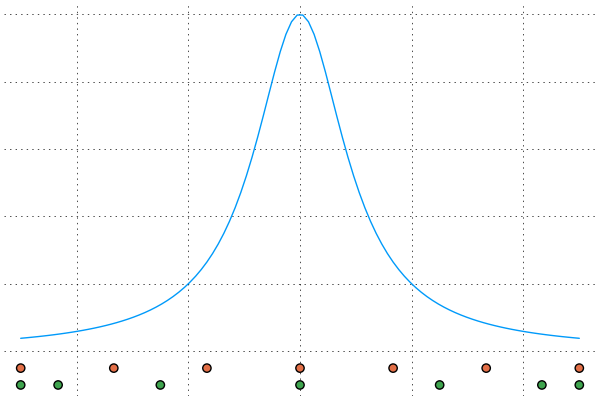

In [11]:
N = 7
xx1 = linspace(-5,5,N)
xx2 = 5*cos(pi*(0:(N-1))./(N-1))
plot(f,-5,5,border=false,legend=false,ticks=false)
scatter!(xx1,-0.05*ones(N)) # point set 1
scatter!(xx2,-0.1*ones(N)) # point set 2

In [28]:
"""fit the coefficients of a polynomial interpolant
c = polyfit(x,y,n) fits a degree n polynomial to the
data poly(x,c)"""
function polyfit(x,y,n)
    m = length(x) # datapoints
    Z = zeros(m,n+1)
    for i=1:m # Should fill this out columnwise.
        xi = 1.
        for j=1:n+1
            Z[i,j] = xi
            xi *= x[i]
        end
    end
    return Z\y
end
""" Evaluate a polynomial vs. Horner's rule """
function polyval(c,x)
    # based on Matlab's Horner's rule 
    m = length(x)
    y = zeros(m)
    
    if length(c) > 0
        y[:] = c[end]
    end
    for i=2:length(c)
        y = x .* y + c[end-i+1]
    end
    return y
end
@show polyfit([1,2,3.],[1,4.,9],2)
@show polyval([0.,0.,1.],[0.5,4.])

polyfit([1,2,3.0],[1,4.0,9],2) = [0.0,0.0,1.0]
polyval([0.0,0.0,1.0],[0.5,4.0]) = [0.25,16.0]


2-element Array{Float64,1}:
  0.25
 16.0 


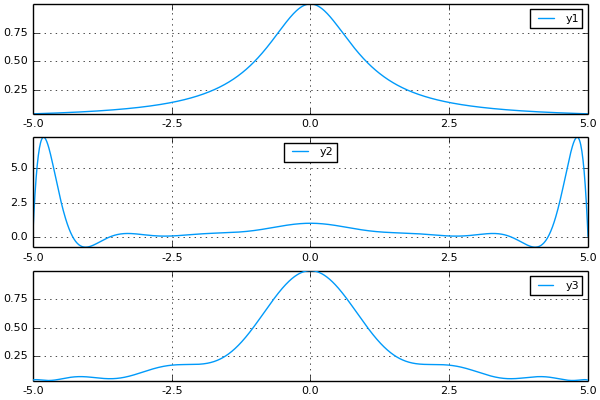

In [32]:
N = 15
xx1 = linspace(-5,5,N)
xx2 = 5*cos(pi*(0:(N-1))./(N-1))

# build two interpolants
c1 = polyfit(xx1,f(xx1),N-1)
c2 = polyfit(xx2,f(xx2),N-1)

xxall = linspace(-5,5,1000)
Y = [f(xxall) polyval(c1,xxall) polyval(c2,xxall)]
l = @layout([a;b;c])
plot(xxall,Y,layout=l)

Interact.Slider{Int64}(Signal{Int64}(12, nactions=0),"N",12,3:21,true)

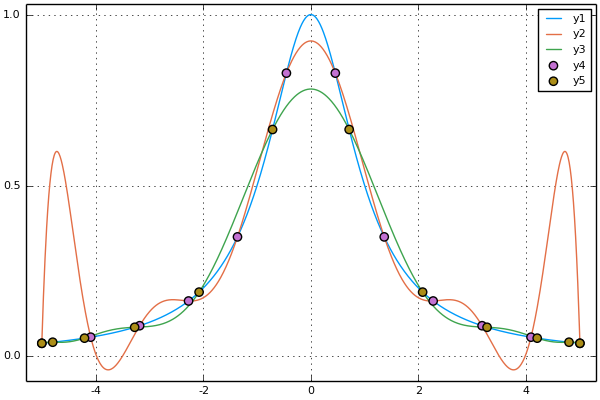

In [34]:
using Interact
@manipulate for N=3:21
    xx1 = linspace(-5,5,N)
    xx2 = 5*cos(pi*(0:(N-1))./(N-1))

    # build two interpolants
    c1 = polyfit(xx1,f(xx1),N-1)
    c2 = polyfit(xx2,f(xx2),N-1)

    xxall = linspace(-5,5,1000)
    Y = [f(xxall) polyval(c1,xxall) polyval(c2,xxall)]
    plot(xxall,Y)
    scatter!(xx1,f(xx1))
    scatter!(xx2,f(xx2))
end